In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# 1. 평균 검정(모집단 표준편차를 모르는 경우)
고객서비스센터의 고객만족도 평균은 78.0이다.  
개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.  
개선활동이 만족도를 변화시켰는가? (a=0.05) 

- 데이터 : 85.0 79.0 79.1 79.9 81.6 78.6 85.4 83.4 78.1 79.2

In [2]:
# df를 직접 입력
df=pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 1-Sample t-test
t_result=stats.ttest_1samp(df, 78.0)

# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("t 통계랑 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계랑 : [3.379]
p-value : [0.008]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.008이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 있다

# 2. 2 Sample t-test
제품을 A공급자와 B공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다.  
공급자 간에 모평균에 차이가 있다고 할 수 있는가? (유의수준 a=0.05)



In [3]:
# df1, df2를 직접 입력
df1=pd.DataFrame({'sample': [1.883, 1.175, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2=pd.DataFrame({'sample': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

# 2-Sample t-test
t_result=stats.ttest_ind(df1, df2)

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[0.748]
p:[0.467]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.467이므로 고객간에 고객만족도의 차이가 있다고 할 수 없다.

# 3. Paired t-test 
회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.  
회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [4]:
# df1, df2를 직접 입력
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

# Paired t-test
t_result=stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p갑 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paired t-test의 t값 p값 출력
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.05]


> 결론 : 유의수준 5%에서 검정결과 P값이 0.05이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 없다.

# 4. 1 Proportion test
동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다.  
이 동전은 정상인가를 유의수준 a=0.05로써 검정하라.  
정상적인 동전을 던질 때, 앞면이 나올 확률을 50%이다.

In [44]:
# 변수 선연
count = 40
n_obs=100
value=0.5

# Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# Proportion test 결과 출력
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(pval))

1 Proportion test
z:-2.041
p:0.041


> 결론 : 결과적으로 이 동전은 정상이라고 판단할 수 있다.

# 5. 2 Proportion test
동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
두 공정의 불량률이 같다고 할 수 있는가?
(유의수준(a)=0.05)

- 공장 A : N1=1200, X1=14
- 공장 B : N2=1200, X2=5

In [45]:
# 변수 선언
count = np.array([14, 5])
nobs  = np.array([1200, 1200])

# Proportion test 실행
stat, pval = proportions_ztest(count, nobs)

# Proportion test 결과 출력
print('2 Proportion test')
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

2 Proportion test
z:2.073
p:0.038


> 결론 : 두 공정의 불량률은 같다고 할 수 없다.

# 6. 카이제곱 검정
노트북 컴퓨터의 6가지 제품(A, B, C, D, E, F)에 대하여 7가지 제품의 이미지를 중복 선택 할 수 있도록 32명의 소비자를 대상으로 설문 조사한 Table이다.  
각 제품에 대해 이미지에 대해 차이가 있겠는가? (유의수준 0.05)

In [5]:
# df 생성
df = pd.DataFrame({'A': [18,  1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                   'C': [4, 1, 3, 4, 9, 5, 4],'D': [4, 1, 2, 3, 2, 7, 3],
                   'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:98.274
p:0.000
degree pf freedom: 30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


> 결론 : 유의수준 5%에서 각 제품의 이미지에 대해 차이가 있다고 할 수 없다.

# 7. One way ANOVA
철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데,
강종별과 type에 따라 2차정련 시간에 차이가 있는지 검정하라 (유의수준 0.05)

- (data set:ANOVA.csv)

In [6]:
df=pd.read_csv("../data/ANOVA.csv")

One-way 
F검정통계량 : 4.172 
p-value : 0.019 


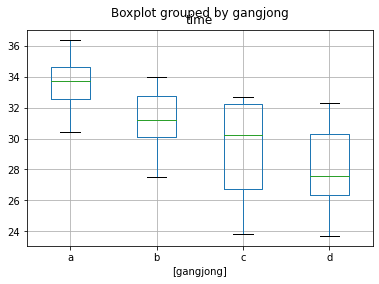

In [7]:
df.boxplot(by='gangjong')

group1 = df.loc[df.gangjong=='a']
group2 = df.loc[df.gangjong=='b']
group3 = df.loc[df.gangjong=='c']
group4 = df.loc[df.gangjong=='d']

f_result = stats.f_oneway(group1['time'],group2['time'], group3['time'], group4['time'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ")
print( "F검정통계량 : {} " .format(f))
print( "p-value : {} " .format(p))

> 결론 : 유의수준 5%에서 검정결과 P값이 0.019이므로 강종별 평균 차이가 있다고 할 수 있다.

One-way 
F검정통계량 : 9.654 
p-value : 0.005 


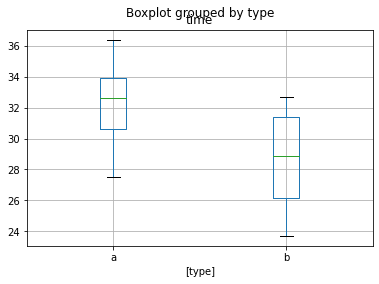

In [8]:
df.boxplot(by='type')

group1 = df.loc[df.type=='a']
group2 = df.loc[df.type=='b']


f_result = stats.f_oneway(group1['time'],group2['time'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ")
print( "F검정통계량 : {} " .format(f))
print( "p-value : {} " .format(p))

> 결론 : 유의수준 5%에서 검정결과 P값이 0.005이므로 타입별 평균 차이가 있다고 할 수 있다.

# 8. 상관분석
초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요.

In [9]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 
       36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15,
       17, 14, 16, 20, 21]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation, p-value 결과 출력
print("Correlation Analysis")
print('corr: {0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr: -0.723
p-value:0.000


> 결론 : 부품수리시간과 부품수간에 "음의 상관성"이 있다고 할 수 있다.

# 단순선형 회귀분석
초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출

In [10]:
# 데이터 구성: Series, DataFrame
import numpy as np
# 행렬 연산
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf

# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline

In [11]:
# 맑은 고딕 적용
plt.rc("font", family="Malgun Gothic")

In [25]:
df_raw = pd.read_csv("../data/correlation.CSV", engine = "python")
df_raw=df_raw[['strength', 'b_time']]
df_raw.head()

,strength,b_time
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894


In [26]:
df_raw.describe().round(3)

,strength,b_time
count,86.000,86.000
mean,32.192,0.675
std,3.290,0.071
min,27.000,0.540
25%,29.500,0.620
50%,31.000,0.654
75%,34.200,0.735
max,39.000,0.849


<AxesSubplot:xlabel='strength', ylabel='b_time'>

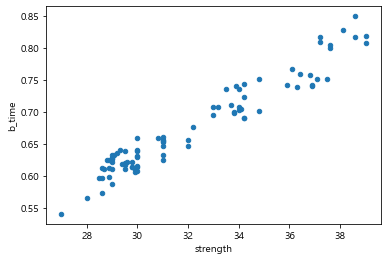

In [37]:
df_raw.plot.scatter(x = "strength", y = "b_time")

In [38]:
df_raw.corr(method = "pearson").round(3)

,strength,b_time
strength,1.000,0.966
b_time,0.966,1.000


In [39]:
reg_model = smf.ols(formula = "strength ~ b_time", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           4.60e-51
Time:                        02:19:27   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


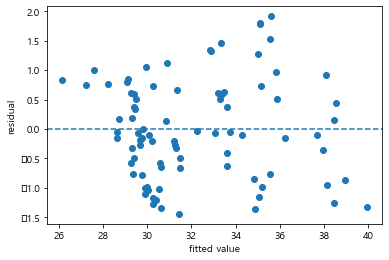

In [40]:
# 잔차의 등분산성: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

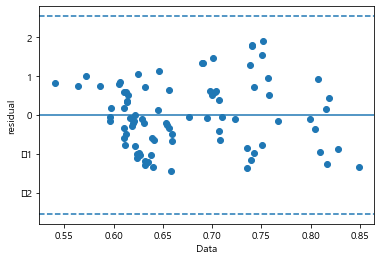

In [41]:
# 잔차의 독립성
plt.scatter(df_raw["b_time"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


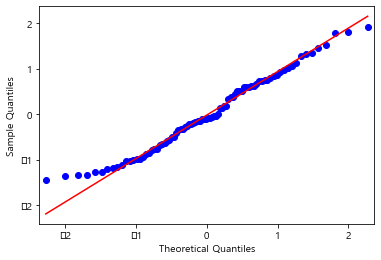

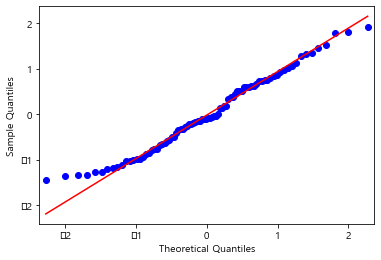

In [42]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

In [43]:
# 정규성 검정
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

NormaltestResult(statistic=5.137339293334132, pvalue=0.0766374324997326)

> 최종 회귀식 : y_hat=2.1034 + 44.5520 * strength  
> => 초코칩의 강도가 1단위 증가할 때마다 굽는 시간은 44.5분 증가